In [1]:
# !pip install markupsafe==2.0.1 Jinja2

In [2]:
# Import libraries
import pandas as pd
import kaggle
from pycaret.classification import *

In [3]:
data = "../data/"

In [4]:
# download Gym Customer Churn Prediction dataset from kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('ankitverma2010/ecommerce-customer-churn-analysis-and-prediction', path=data, unzip=True)

In [8]:
import os

# Specify the original and new file names
original_file_name = data + 'E Commerce Dataset.xlsx'  # Replace with the actual file name
new_file_name = data + 'ECommerceDataset.xlsx'

# Rename the file
os.rename(original_file_name, new_file_name)

In [9]:
# read the data
df = pd.read_excel(data + 'ECommerceDataset.xlsx', sheet_name='E Comm')
# view the data
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28


In [10]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [11]:
# get the spread of the target variable
df['Churn'].value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [12]:
# Assign target to variable
target = 'Churn'

# identify columns to ignore
ignored = 'CustomerID'
# Identify categorical features
cat_features = [col for col in df.columns 
                if col != target 
                and col != ignored 
                and not pd.api.types.is_numeric_dtype(df[col])
                or (col != target and pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique() < 5)
                ]

numeric_features = [col for col in df.columns
                   if col not in target and col not in ignored and col not in cat_features]

# view categorical features
cat_features

['PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'Complain']

In [13]:
numeric_features

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [15]:
df['Complain'].nunique()

0    4026
1    1604
Name: Complain, dtype: int64

In [16]:
experiment = setup(data=df, target= target, categorical_features=cat_features,
                    numeric_features = numeric_features,
                    ignore_features=ignored,
                    session_id=40)

,Description,Value
0,Session id,40
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(5630, 20)"
4,Transformed data shape,"(5630, 36)"
5,Transformed train set shape,"(3940, 36)"
6,Transformed test set shape,"(1690, 36)"
7,Ignore features,10
8,Ordinal features,2
9,Numeric features,11


In [17]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9637,0.9838,0.8702,0.9116,0.8898,0.8681,0.8689,0.3850
lightgbm,Light Gradient Boosting Machine,0.9604,0.9832,0.8371,0.9215,0.8766,0.8531,0.8550,0.2980
et,Extra Trees Classifier,0.9525,0.9888,0.7541,0.9542,0.8420,0.8146,0.8226,0.3390
rf,Random Forest Classifier,0.9485,0.9848,0.7422,0.9397,0.8288,0.7990,0.8070,0.2950
dt,Decision Tree Classifier,0.9365,0.8980,0.8400,0.7972,0.8167,0.7784,0.7797,0.0910
gbc,Gradient Boosting Classifier,0.9096,0.9370,0.6166,0.8018,0.6959,0.6440,0.6524,0.3530
lr,Logistic Regression,0.8931,0.8896,0.5261,0.7693,0.6229,0.5634,0.5782,1.0560
ada,Ada Boost Classifier,0.8929,0.9169,0.5851,0.7263,0.6474,0.5852,0.5903,0.1860
lda,Linear Discriminant Analysis,0.8896,0.8820,0.4931,0.7659,0.5987,0.5384,0.5566,0.1070
ridge,Ridge Classifier,0.8739,0.0000,0.2912,0.8777,0.4355,0.3845,0.4600,0.0830


In [18]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [20]:
get_config('X_train_transformed').head(2)

,Tenure,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredLoginDevice_Computer,CityTier_1.0,CityTier_3.0,CityTier_2.0,WarehouseToHome,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,...,MaritalStatus_Single,MaritalStatus_Married,MaritalStatus_Divorced,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3310,9.0,1.0,0.0,0.0,1.0,0.0,0.0,34.0,1.0,0.0,...,1.0,0.0,0.0,3.0,0.0,12.0,2.0,2.0,2.0,150.589996
2867,1.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,...,1.0,0.0,0.0,3.0,0.0,23.0,1.0,2.0,1.0,136.020004


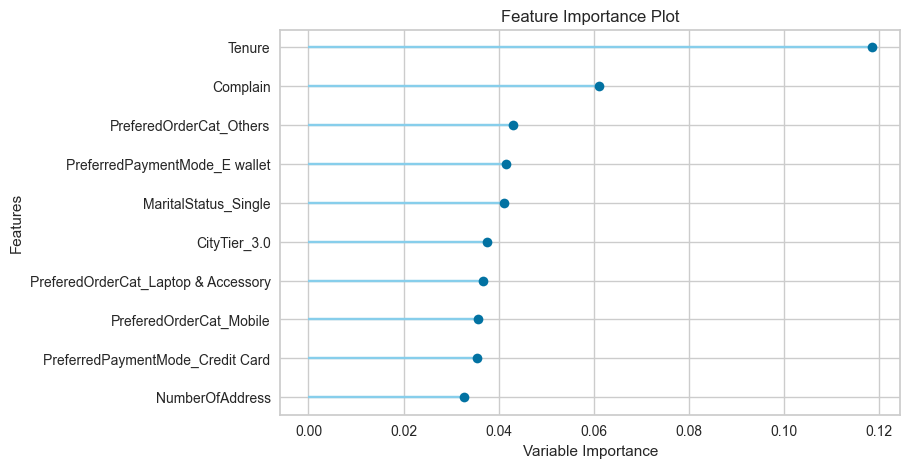

In [21]:
# plot feature importance
plot_model(best_model, plot = 'feature')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9556,0.9685,0.7860,0.9412,0.8566,0.8306,0.8353


,Samples,Accuracy,AUC,Recall,Precision,F1,Kappa,MCC,Selection Rate
Gender,,,,,,,,,
Female,708,0.946328,0.875309,0.769231,0.891089,0.825688,0.79417,0.79717,0.142655
Male,982,0.962322,0.896967,0.797619,0.978102,0.878689,0.856658,0.862904,0.139511


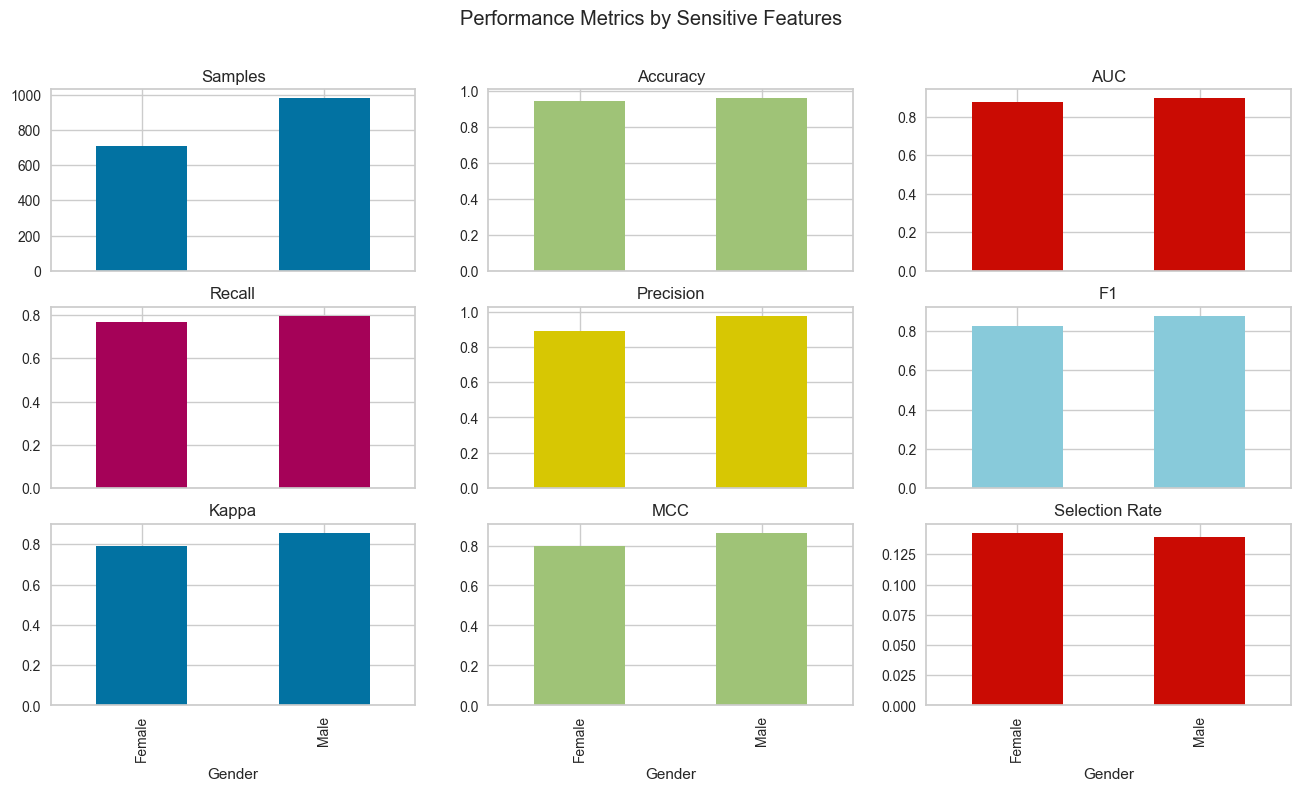

In [23]:
# check fairness
check_fairness(best_model, sensitive_features = ['Gender'])

In [24]:
# save model
save_model(best_model, 'my_ecommerce_churn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Tenure', 'WarehouseToHome',
                                              'HourSpendOnApp',
                                              'NumberOfDeviceRegistered',
                                              'SatisfactionScore',
                                              'NumberOfAddress',
                                              'OrderAmountHikeFromlastYear',
                                              'CouponUsed', 'OrderCount',
                                              'DaySinceLastOrder',
                                              'CashbackAmount'],
                                     transformer=SimpleImputer(add_indicator=...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
       